In [4]:
import pandas as pd

# Replace 'your_dataset.csv' with your actual file name
df = pd.read_csv("improved_predictive_demand_data.csv")

# See the top 5 rows
print(df.head(12))

          Date      Store                  Item  Sales  Month  Week  \
0   2024-01-01      Jammu  Packed Bottled Water     16      1     1   
1   2024-01-01      Jammu            Dry Fruits     86      1     1   
2   2024-01-01      Jammu        Woolen Jackets     60      1     1   
3   2024-01-01      Jammu   Mosquito Repellents      6      1     1   
4   2024-01-01      Jammu        Cold Beverages      4      1     1   
5   2024-01-01      Jammu                  Rice      3      1     1   
6   2024-01-01  Hyderabad  Packed Bottled Water      5      1     1   
7   2024-01-01  Hyderabad            Dry Fruits      3      1     1   
8   2024-01-01  Hyderabad        Woolen Jackets      6      1     1   
9   2024-01-01  Hyderabad   Mosquito Repellents     31      1     1   
10  2024-01-01  Hyderabad        Cold Beverages     15      1     1   
11  2024-01-01  Hyderabad                  Rice     24      1     1   

    IsHoliday  Store_ID Store_Type Region  Item_ID  Category  Price  \
0    

In [5]:
df.Store.value_counts()
df.Item.value_counts()

Item
Packed Bottled Water    732
Dry Fruits              732
Woolen Jackets          732
Mosquito Repellents     732
Cold Beverages          732
Rice                    732
Name: count, dtype: int64

In [6]:
print(df.shape)         # Rows and columns
print(df.columns)       # Column names
print(df.head(5))       # First 5 rows
print(df.info())        # Data types, missing values
print(df.describe())    # Numeric stats


(4392, 18)
Index(['Date', 'Store', 'Item', 'Sales', 'Month', 'Week', 'IsHoliday',
       'Store_ID', 'Store_Type', 'Region', 'Item_ID', 'Category', 'Price',
       'Temperature', 'Rainfall', 'Is_Ugadi', 'Is_Winter', 'Discount'],
      dtype='object')
         Date  Store                  Item  Sales  Month  Week  IsHoliday  \
0  2024-01-01  Jammu  Packed Bottled Water     16      1     1          0   
1  2024-01-01  Jammu            Dry Fruits     86      1     1          0   
2  2024-01-01  Jammu        Woolen Jackets     60      1     1          0   
3  2024-01-01  Jammu   Mosquito Repellents      6      1     1          0   
4  2024-01-01  Jammu        Cold Beverages      4      1     1          0   

   Store_ID Store_Type Region  Item_ID  Category  Price  Temperature  \
0         1    Tourism  North      101  Beverage     20     4.691246   
1         1    Tourism  North      102   Grocery    250     2.934874   
2         1    Tourism  North      103  Clothing   1500     5.823237  

In [7]:
print(df.isnull().sum())


Date           0
Store          0
Item           0
Sales          0
Month          0
Week           0
IsHoliday      0
Store_ID       0
Store_Type     0
Region         0
Item_ID        0
Category       0
Price          0
Temperature    0
Rainfall       0
Is_Ugadi       0
Is_Winter      0
Discount       0
dtype: int64


In [8]:
df['Date'] = pd.to_datetime(df['Date'])


In [9]:
df['Item'] = df['Item'].astype('category')
df['Store'] = df['Store'].astype('category')


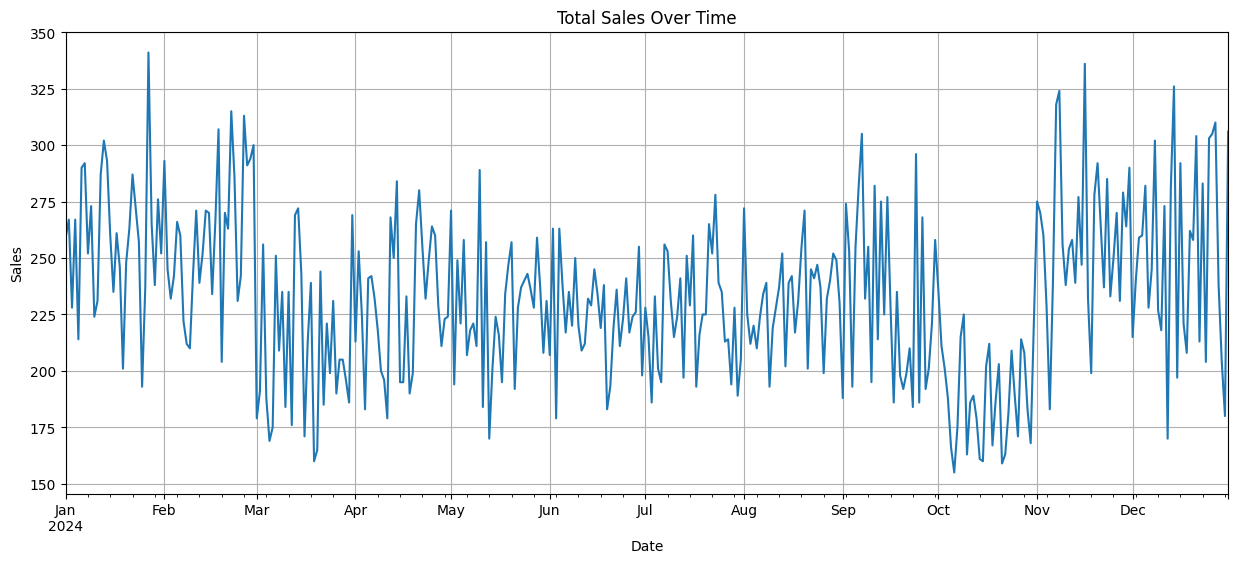

In [10]:
import matplotlib.pyplot as plt

df.groupby('Date')['Sales'].sum().plot(figsize=(15,6))
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


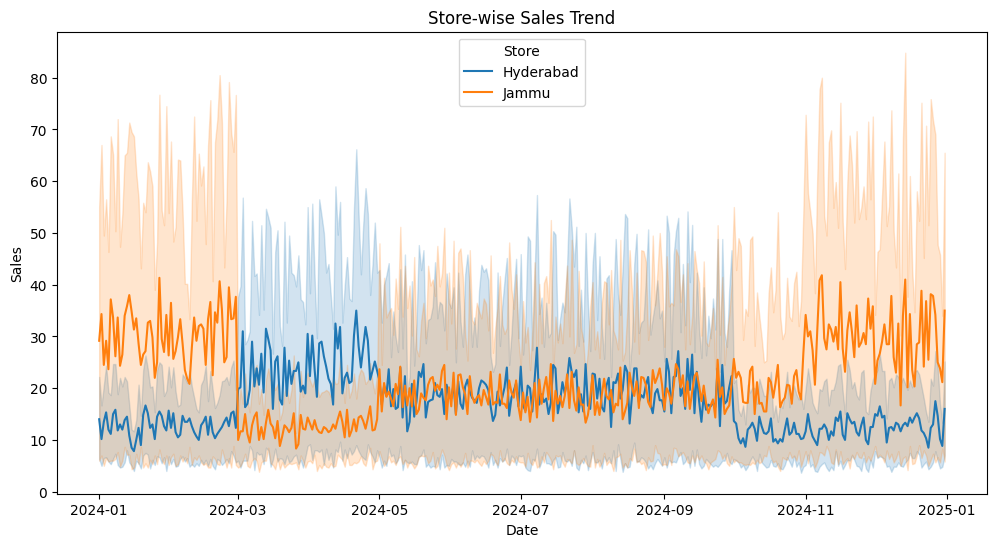

In [11]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Sales", hue="Store")
plt.title("Store-wise Sales Trend")
plt.show()


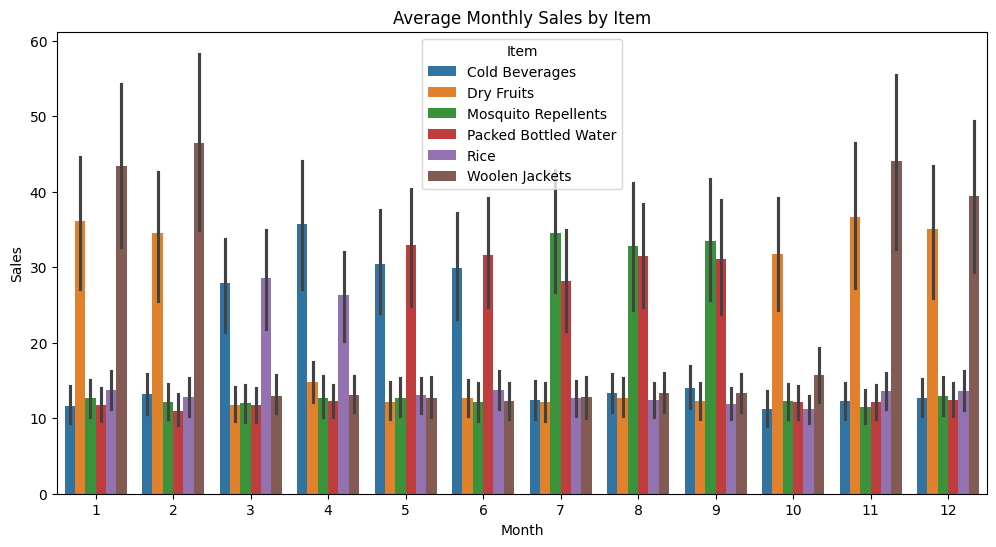

In [12]:
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Month", y="Sales", hue="Item", estimator='mean')
plt.title("Average Monthly Sales by Item")
plt.show()


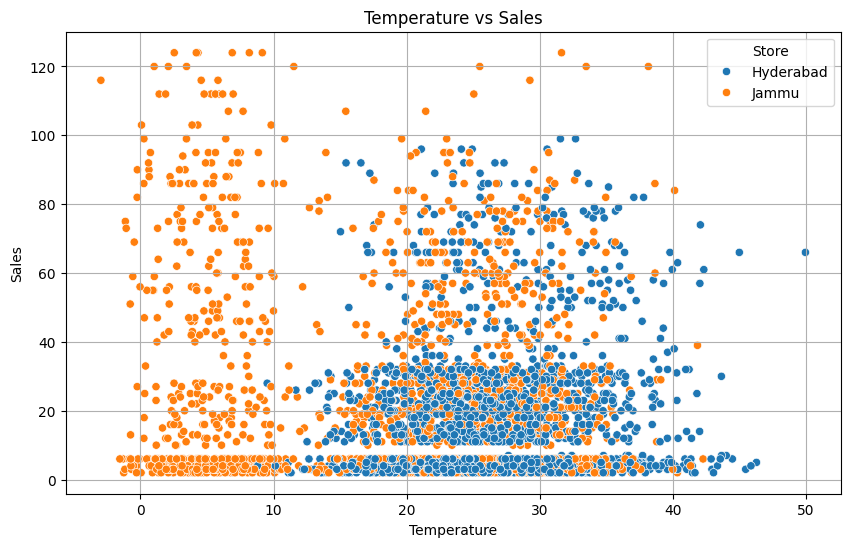

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Temperature', y='Sales', hue='Store')
plt.title("Temperature vs Sales")
plt.grid(True)
plt.show()


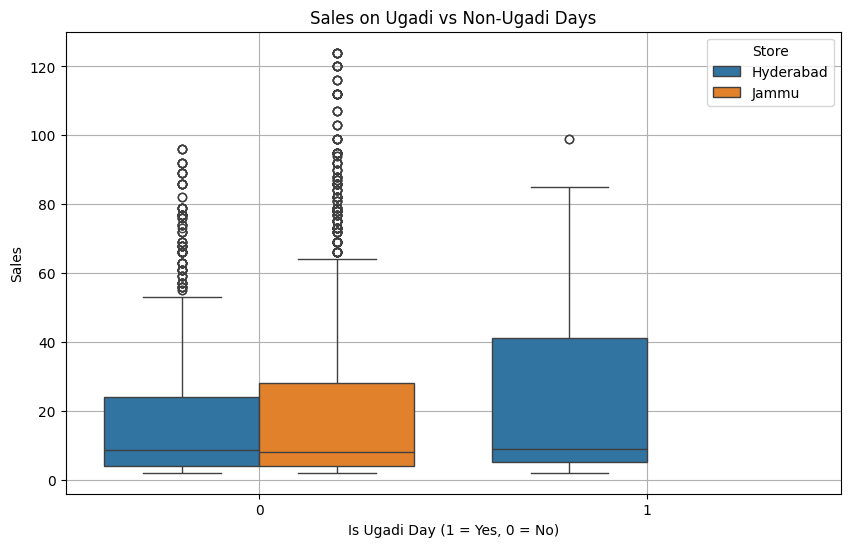

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Is_Ugadi', y='Sales', hue='Store')
plt.title("Sales on Ugadi vs Non-Ugadi Days")
plt.xlabel("Is Ugadi Day (1 = Yes, 0 = No)")
plt.ylabel("Sales")
plt.grid(True)
plt.show()



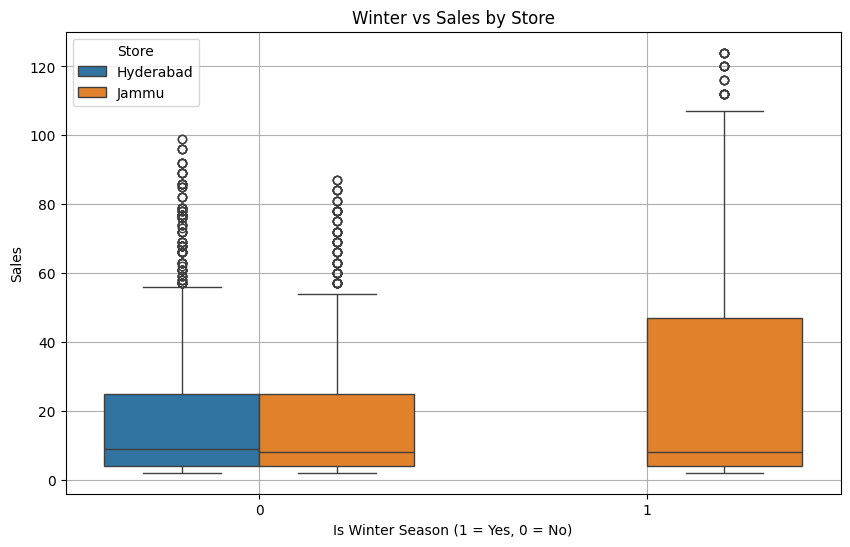

In [15]:

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Is_Winter', y='Sales', hue='Store')
plt.title("Winter vs Sales by Store")
plt.xlabel("Is Winter Season (1 = Yes, 0 = No)")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


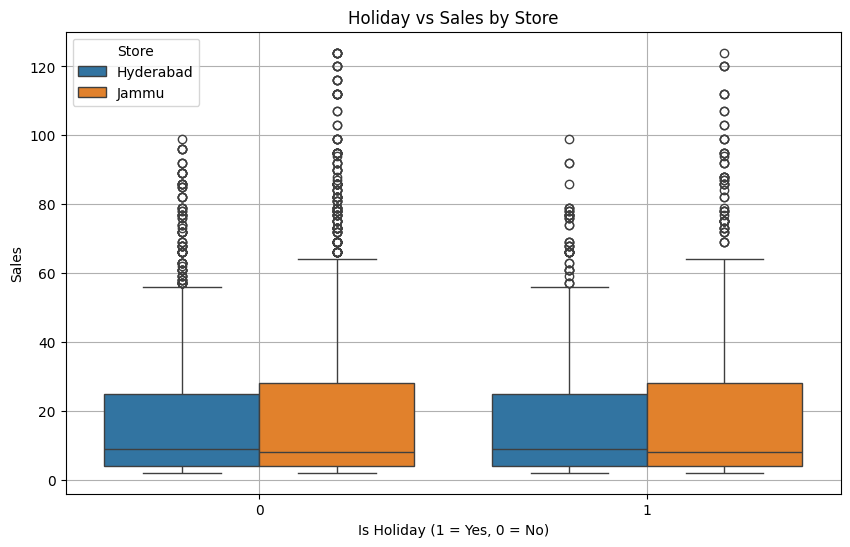

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='IsHoliday', y='Sales', hue='Store')
plt.title("Holiday vs Sales by Store")
plt.xlabel("Is Holiday (1 = Yes, 0 = No)")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


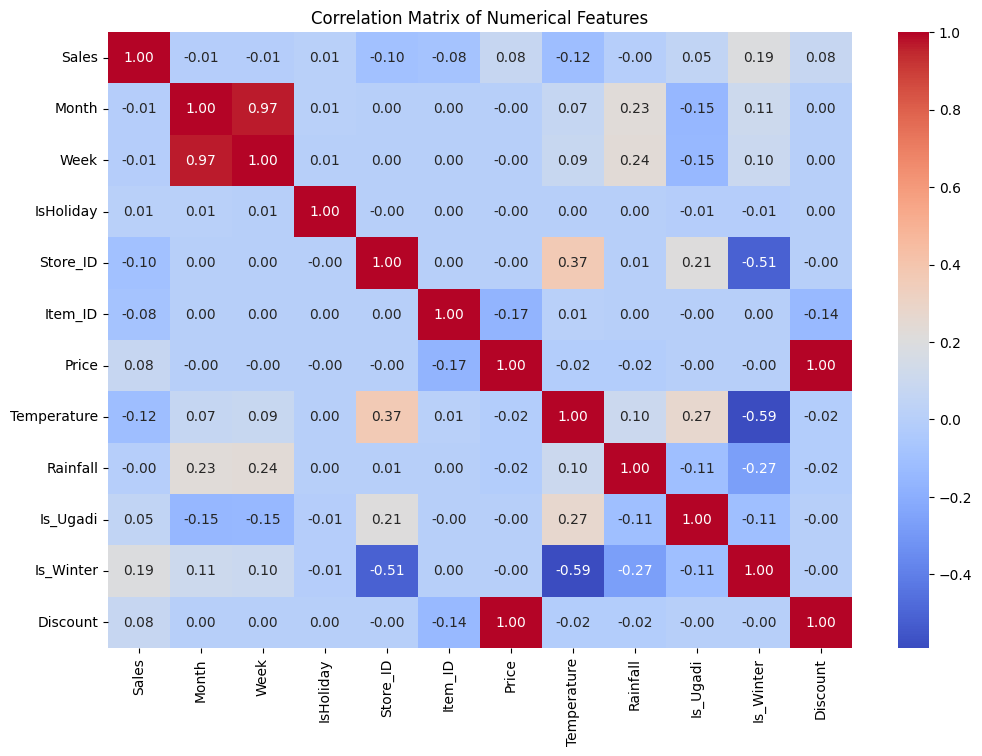

In [17]:
plt.figure(figsize=(12,8))

# Only use numeric columns
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()



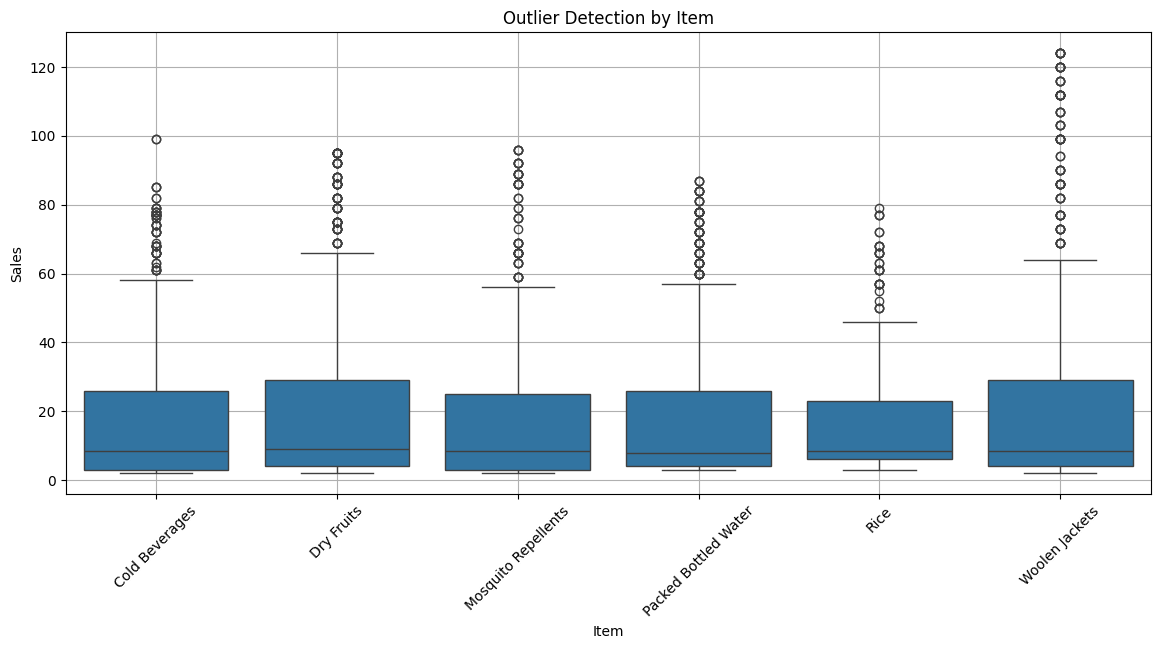

In [18]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Item", y="Sales")
plt.xticks(rotation=45)
plt.title("Outlier Detection by Item")
plt.grid(True)
plt.show()


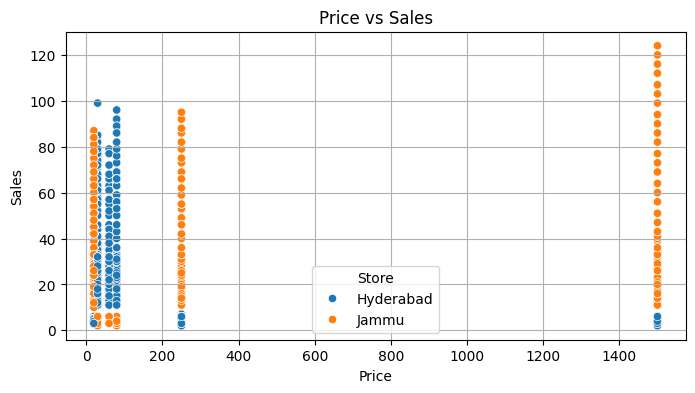

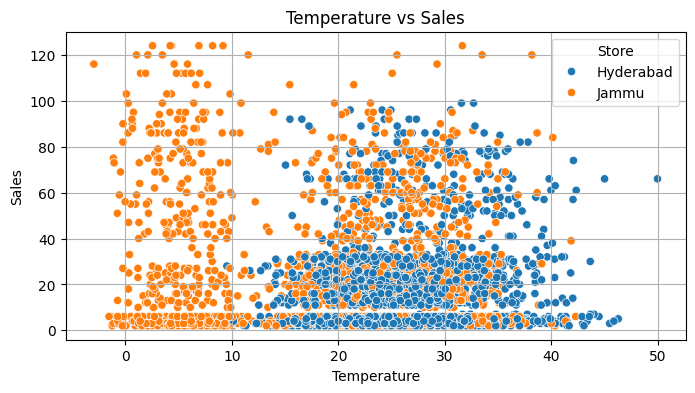

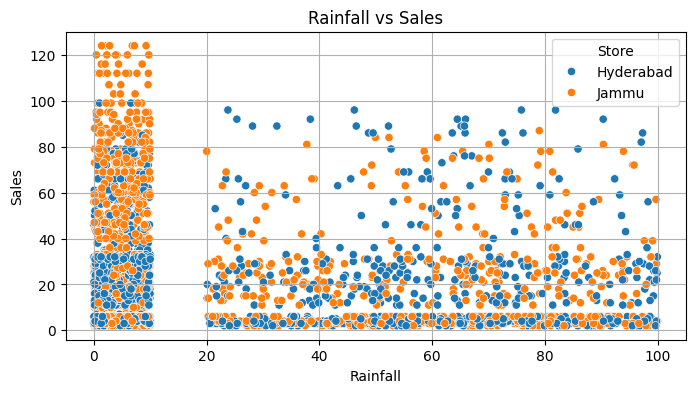

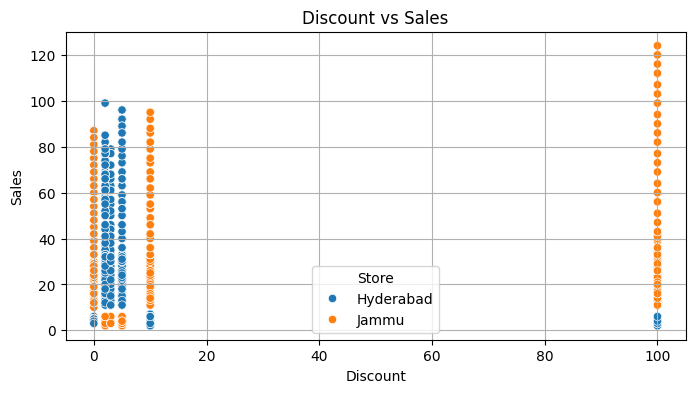

In [19]:
num_cols = ['Price', 'Temperature', 'Rainfall', 'Discount']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=col, y='Sales', hue='Store')
    plt.title(f"{col} vs Sales")
    plt.grid(True)
    plt.show()


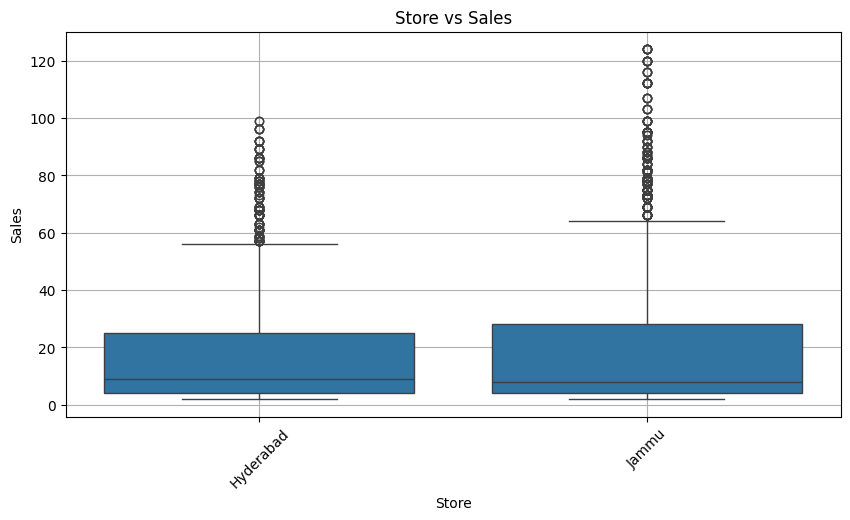

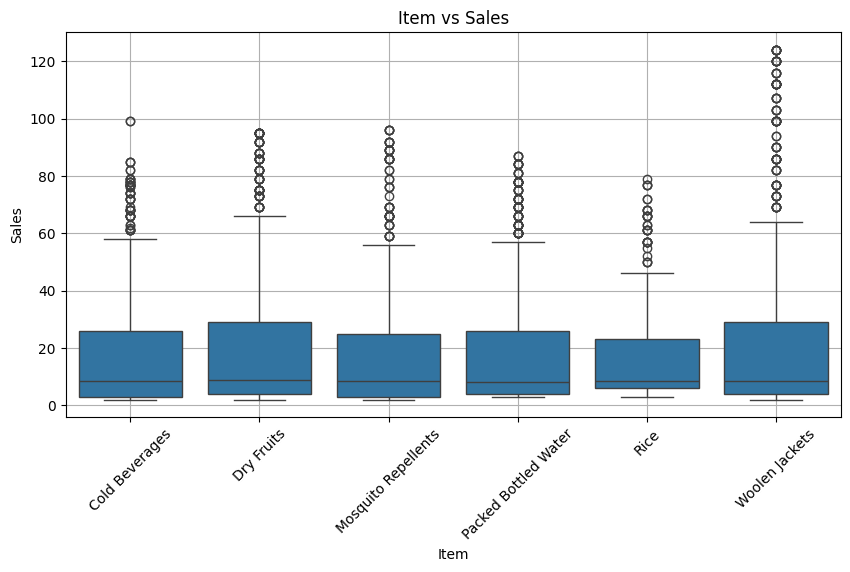

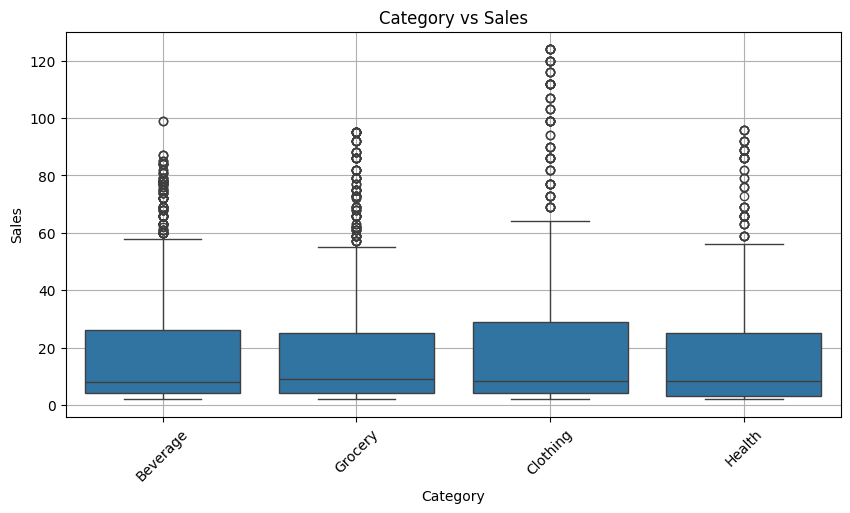

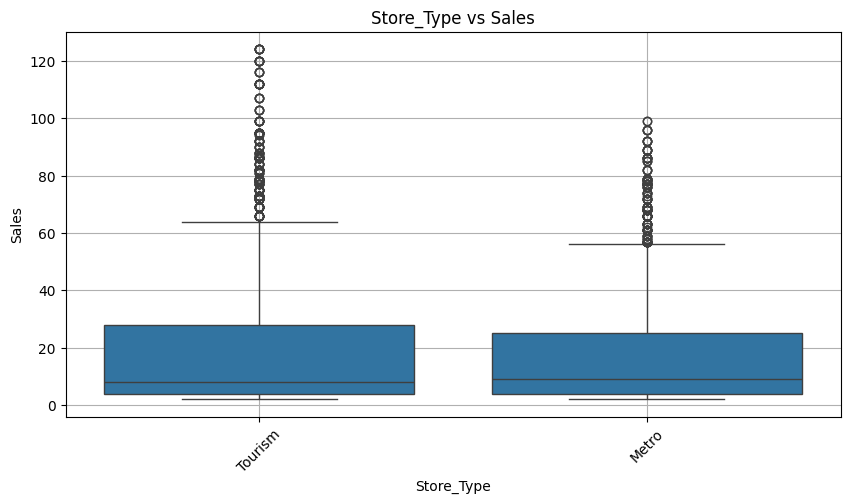

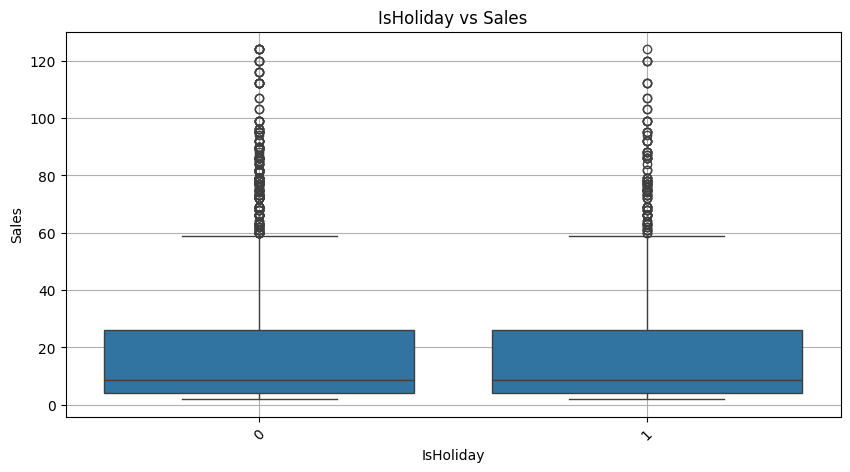

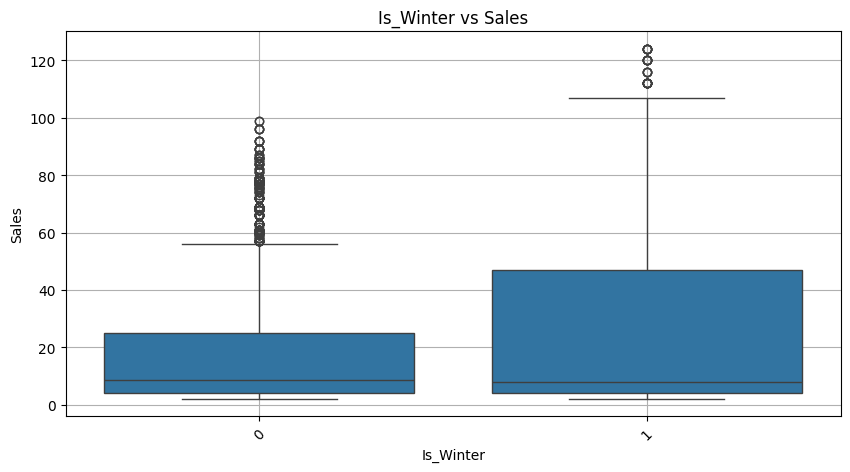

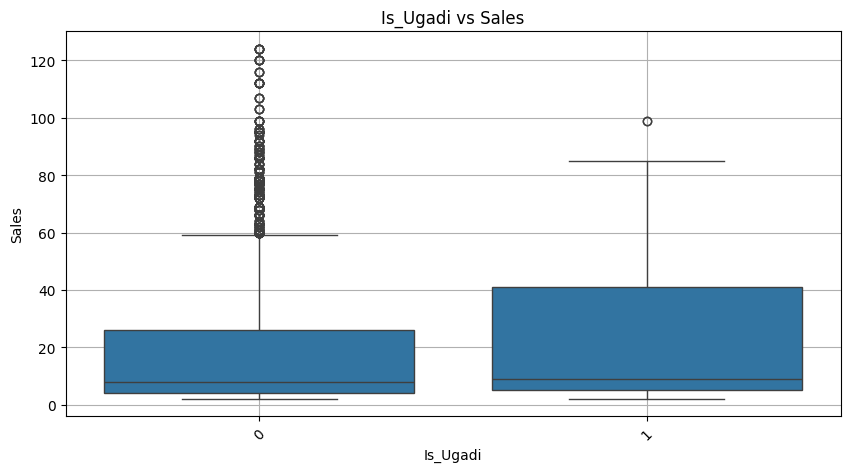

In [20]:
cat_features = ['Store', 'Item', 'Category', 'Store_Type', 'IsHoliday', 'Is_Winter', 'Is_Ugadi']

for col in cat_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y='Sales')
    plt.title(f"{col} vs Sales")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


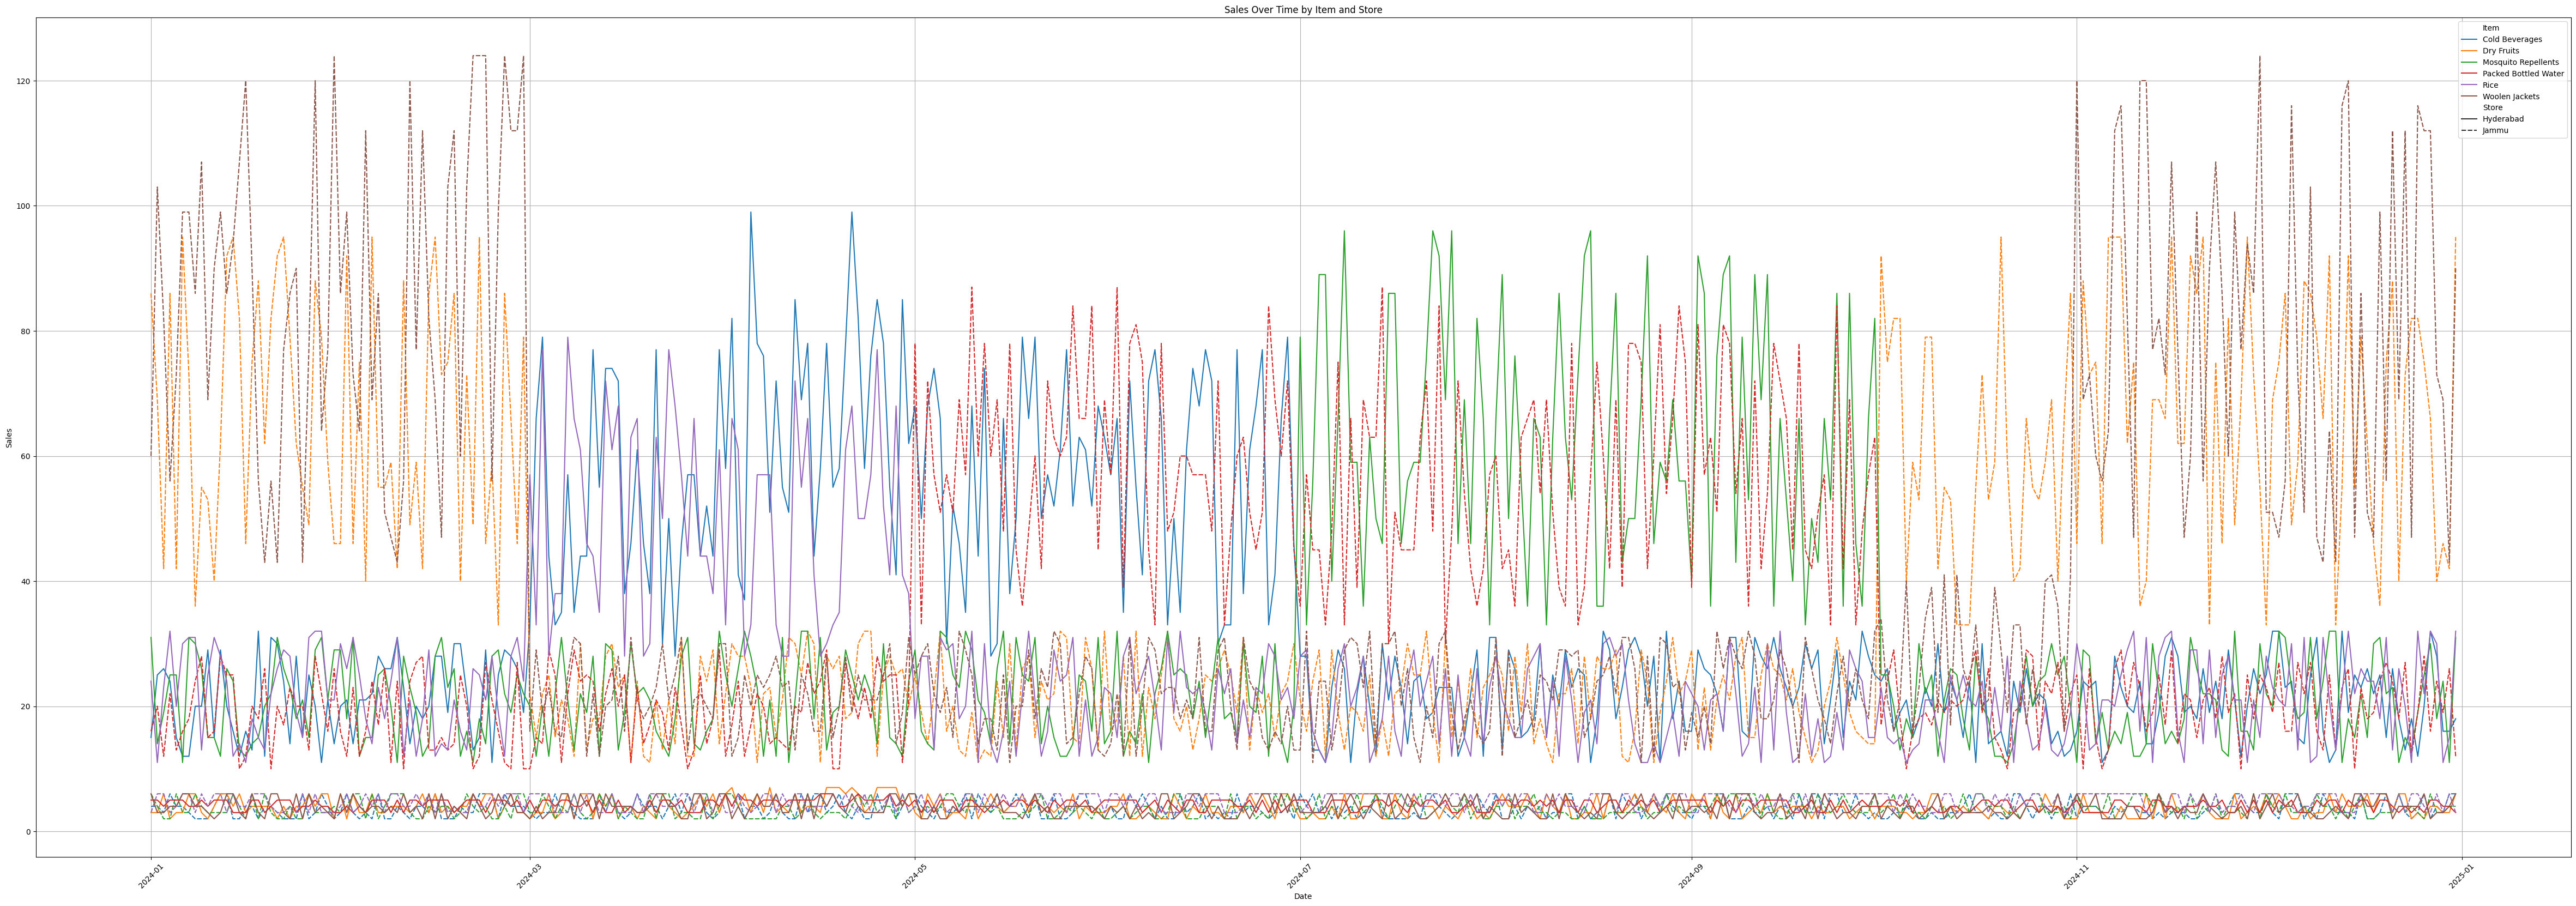

In [21]:
plt.figure(figsize=(60, 20))
sns.lineplot(data=df, x="Date", y="Sales", hue="Item", style="Store")
plt.title("Sales Over Time by Item and Store")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


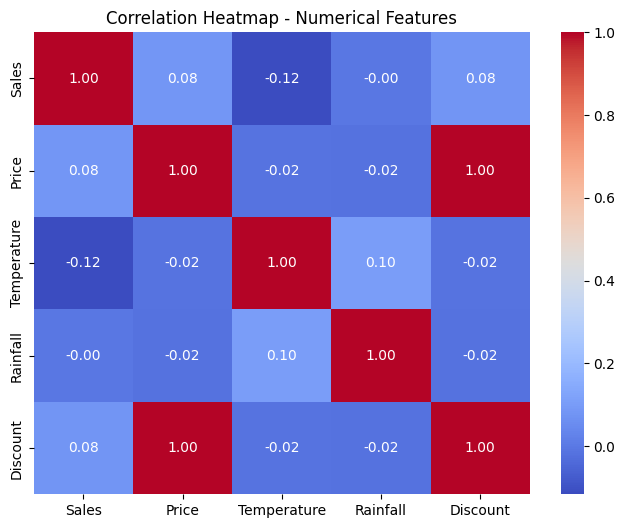

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns for correlation
numeric_cols = ['Sales', 'Price', 'Temperature', 'Rainfall', 'Discount']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Numerical Features")
plt.show()


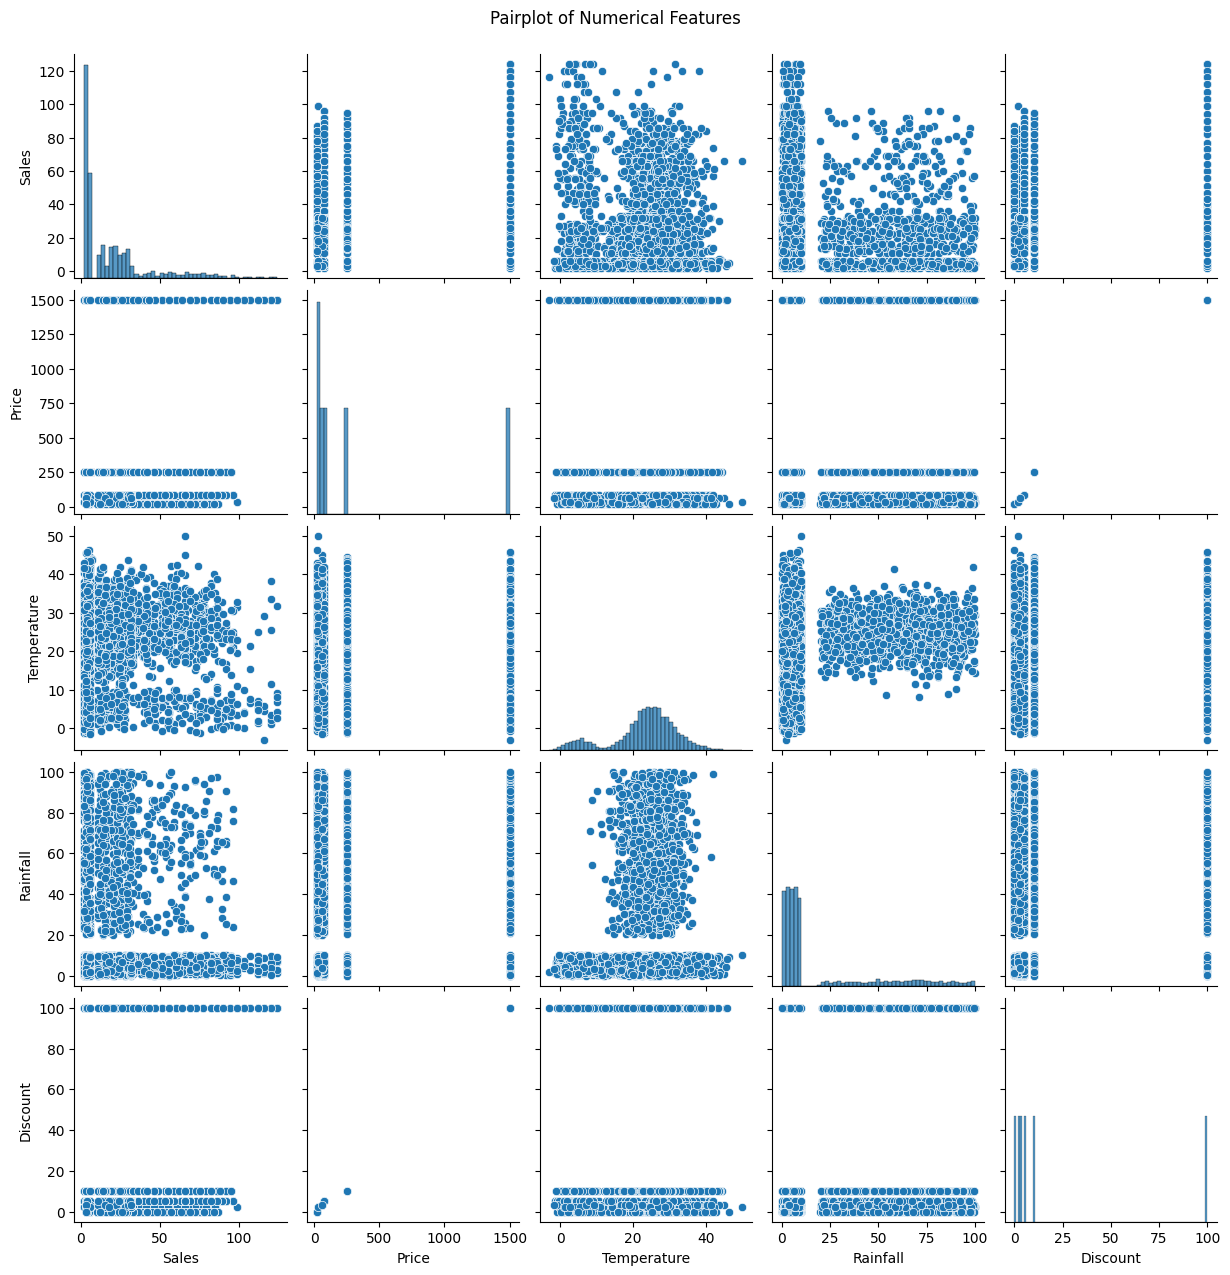

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose a manageable subset of numeric features
selected_features = ['Sales', 'Price', 'Temperature', 'Rainfall', 'Discount']

# Plot pairplot
sns.pairplot(df[selected_features], corner=False)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


In [24]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

# Example: Detect outliers in Sales
outliers_sales = detect_outliers_iqr(df, 'Sales')
print(f"Sales Outliers Found: {len(outliers_sales)}")


Sales Outliers Found: 378


In [25]:
# Label Encoding (simpler for trees)
from sklearn.preprocessing import LabelEncoder

le_store = LabelEncoder()
df['Store_Encoded'] = le_store.fit_transform(df['Store'])

le_item = LabelEncoder()
df['Item_Encoded'] = le_item.fit_transform(df['Item'])

le_type = LabelEncoder()
df['StoreType_Encoded'] = le_type.fit_transform(df['Store_Type'])

le_region = LabelEncoder()
df['Region_Encoded'] = le_region.fit_transform(df['Region'])

# OPTIONAL: Show mapping
print("Store Encoding:", dict(zip(le_store.classes_, le_store.transform(le_store.classes_))))
print("Item Encoding:", dict(zip(le_item.classes_, le_item.transform(le_item.classes_))))
print("StoreType Encoding:", dict(zip(le_type.classes_, le_type.transform(le_type.classes_))))
print("Region Encoding:", dict(zip(le_region.classes_, le_region.transform(le_region.classes_))))

Store Encoding: {'Hyderabad': np.int64(0), 'Jammu': np.int64(1)}
Item Encoding: {'Cold Beverages': np.int64(0), 'Dry Fruits': np.int64(1), 'Mosquito Repellents': np.int64(2), 'Packed Bottled Water': np.int64(3), 'Rice': np.int64(4), 'Woolen Jackets': np.int64(5)}
StoreType Encoding: {'Metro': np.int64(0), 'Tourism': np.int64(1)}
Region Encoding: {'North': np.int64(0), 'South': np.int64(1)}


In [26]:
# Make sure your 'Date' is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract date-based features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Optional: Check first few rows
print(df[['Date', 'Day', 'Month', 'Week', 'Quarter', 'DayOfWeek']].head())


        Date  Day  Month  Week  Quarter  DayOfWeek
0 2024-01-01    1      1     1        1          0
1 2024-01-01    1      1     1        1          0
2 2024-01-01    1      1     1        1          0
3 2024-01-01    1      1     1        1          0
4 2024-01-01    1      1     1        1          0


In [27]:
# Season based on month
def get_season(month):
    if month in [11,12,1,2]:
        return "Winter"
    elif month in [3,4,5,6]:
        return "Summer"
    elif month in [7,8,9,10]:
        return "Monsoon"
    else:
        return "Other"

df['Season'] = df['Month'].apply(get_season)

# Rainfall bins
def get_rain_bin(rain):
    if rain < 10:
        return "Low"
    elif rain < 30:
        return "Medium"
    else:
        return "High"

df['Rain_Bin'] = df['Rainfall'].apply(get_rain_bin)

# Temperature bins
def get_temp_bin(temp):
    if temp < 15:
        return "Cold"
    elif temp < 30:
        return "Mild"
    else:
        return "Hot"

df['Temp_Bin'] = df['Temperature'].apply(get_temp_bin)

# Discount flag
df['Discount_Flag'] = (df['Discount'] > 0).astype(int)

# Check first rows
print(df[['Date', 'Season', 'Rain_Bin', 'Temp_Bin', 'Discount_Flag']].head())


        Date  Season Rain_Bin Temp_Bin  Discount_Flag
0 2024-01-01  Winter      Low     Cold              0
1 2024-01-01  Winter      Low     Cold              1
2 2024-01-01  Winter      Low     Cold              1
3 2024-01-01  Winter      Low     Cold              1
4 2024-01-01  Winter      Low     Cold              1


In [28]:
# One-hot encode new categorical features
df = pd.get_dummies(df, columns=['Season', 'Rain_Bin', 'Temp_Bin'], drop_first=True)

# Check updated columns
print(df.columns)


Index(['Date', 'Store', 'Item', 'Sales', 'Month', 'Week', 'IsHoliday',
       'Store_ID', 'Store_Type', 'Region', 'Item_ID', 'Category', 'Price',
       'Temperature', 'Rainfall', 'Is_Ugadi', 'Is_Winter', 'Discount',
       'Store_Encoded', 'Item_Encoded', 'StoreType_Encoded', 'Region_Encoded',
       'Day', 'Quarter', 'DayOfWeek', 'Discount_Flag', 'Season_Summer',
       'Season_Winter', 'Rain_Bin_Low', 'Rain_Bin_Medium', 'Temp_Bin_Hot',
       'Temp_Bin_Mild'],
      dtype='object')


In [29]:
# Check for missing values
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

if not missing_counts.empty:
    print("Missing values found:\n", missing_counts)
else:
    print("No missing values detected! 🎉")


No missing values detected! 🎉


In [15]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv("improved_predictive_demand_data.csv")

drop_cols = ['Date', 'Store', 'Item', 'Store_ID', 'Store_Type', 'Region', 'Item_ID', 'Category', 'Sales']
X = df.drop(columns=drop_cols)
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (3513, 9), Test shape: (879, 9)


In [19]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
numeric_cols = ['Price', 'Temperature', 'Rainfall', 'Discount']

scaler = StandardScaler()

# Make copies of train & test sets so we keep originals intact
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale numeric columns
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Check scaled values
print("Scaled X_train sample:\n", X_train_scaled[numeric_cols].head())


Scaled X_train sample:
          Price  Temperature  Rainfall  Discount
1929 -0.460975     0.029525 -0.489075 -0.421373
1313 -0.498404    -0.496674 -0.508973 -0.476788
534  -0.573260     0.913938 -0.590130 -0.559912
2924  2.196427     0.159667  0.581772  2.210858
1758 -0.573260     0.600753 -0.625629 -0.559912


In [21]:
from sklearn.ensemble import RandomForestRegressor

# 1️⃣ Initialize the Random Forest model
rf = RandomForestRegressor(
    n_estimators=100,   # 100 trees
    random_state=42     # fixed randomness for reproducibility
)

# 2️⃣ Train the model (fit on training data)
rf.fit(X_train_scaled, y_train)

print("✅ Random Forest model trained successfully!")


✅ Random Forest model trained successfully!


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = rf.predict(X_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Performance:
Mean Absolute Error (MAE): 9.62
Root Mean Squared Error (RMSE): 14.30
R² Score: 0.62


In [25]:
import pandas as pd

# Get feature importance scores from trained RF model
feature_importance = pd.Series(rf.feature_importances_, index=X_train_scaled.columns)

# Sort by importance, descending
feature_importance.sort_values(ascending=False, inplace=True)

# Print top features
print("🔝 Top 10 Most Important Features for Sales Prediction:\n")
print(feature_importance.head(10))


🔝 Top 10 Most Important Features for Sales Prediction:

Discount       0.254781
Price          0.212718
Temperature    0.173630
Rainfall       0.159100
Week           0.090366
Month          0.046379
Is_Winter      0.036849
IsHoliday      0.016609
Is_Ugadi       0.009567
dtype: float64


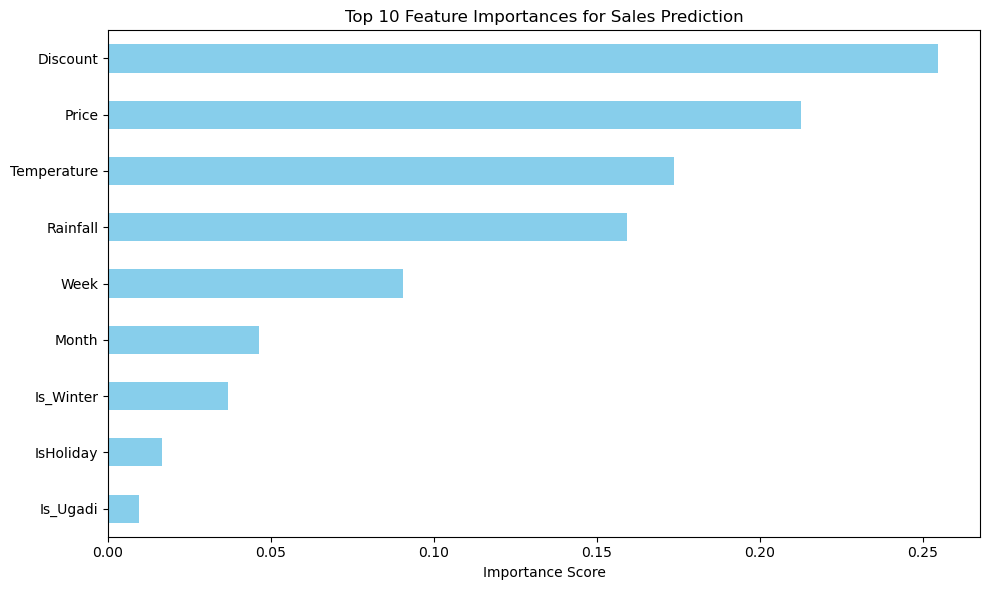

In [27]:
import matplotlib.pyplot as plt

# Plot top 10 features
top_features = feature_importance.head(10)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances for Sales Prediction')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Re-create your best RF model with your chosen hyperparameters or start with default:
rf = RandomForestRegressor(random_state=42)

# Perform 5-Fold Cross-Validation:
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Convert scores because sklearn gives negative MAE for optimization reasons
mae_scores = -cv_scores

# Print the results
print(f"Cross-Validation MAE scores: {mae_scores}")
print(f"Mean MAE: {np.mean(mae_scores):.2f}")
print(f"Std Dev of MAE: {np.std(mae_scores):.2f}")


Cross-Validation MAE scores: [10.12900427 10.99549075 11.08025605 10.70873219 10.39380342]
Mean MAE: 10.66
Std Dev of MAE: 0.36


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the parameter grid to search:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Randomized search with 5-fold CV
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,  # number of parameter combinations to try
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    random_state=42
)

# Fit the search on your training data
rf_random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Hyperparameters:", rf_random_search.best_params_)
print("Best MAE from CV: {:.2f}".format(-rf_random_search.best_score_))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\abcd\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abcd\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abcd\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\abcd\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\abcd\anaconda3\Lib\site-packages\skle

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Best MAE from CV: 10.54


In [44]:
# Train final model with best hyperparameters
final_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
)

final_rf.fit(X_train, y_train)

# Predict on test set
final_predictions = final_rf.predict(X_test)

# Evaluate final model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
final_mae = mean_absolute_error(y_test, final_predictions)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_r2 = r2_score(y_test, final_predictions)

print(f"Final MAE: {final_mae:.2f}")
print(f"Final RMSE: {final_rmse:.2f}")
print(f"Final R²: {final_r2:.2f}")


Final MAE: 9.74
Final RMSE: 14.26
Final R²: 0.62


C:\Users\abcd\AppData\Local\Temp\ipykernel_408\1166526428.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')


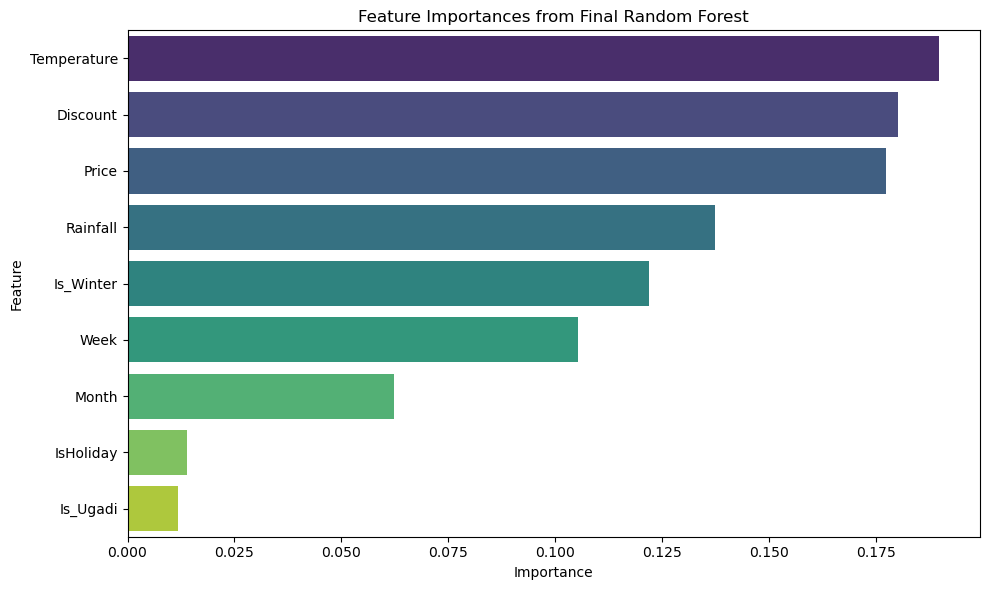

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from final RF
importances = final_rf.feature_importances_
features = X_train.columns

# Create a sorted dataframe for better plotting
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from Final Random Forest')
plt.tight_layout()
plt.show()


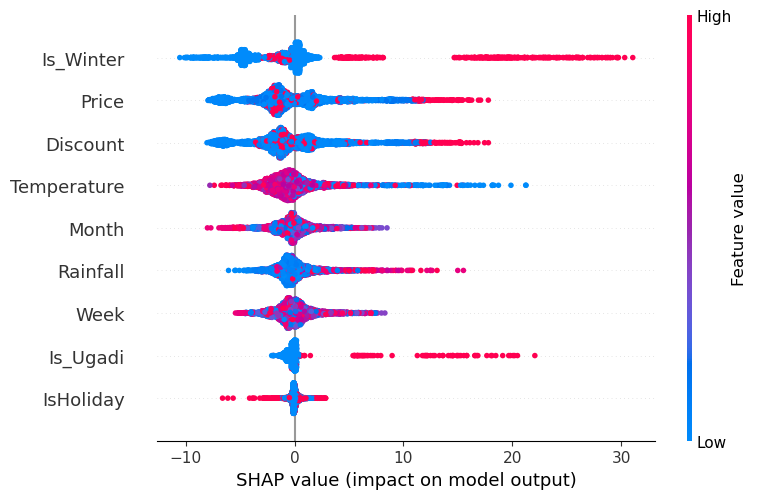

In [46]:
import shap

explainer = shap.TreeExplainer(final_rf)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)


In [54]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

# Step 1: Load your dataset
df = pd.read_csv("improved_predictive_demand_data.csv")  # replace with your file name

# Step 2: Separate features and target
X = df.drop("Sales", axis=1)       # replace "Sales" with your actual target column name
y = df["Sales"]

# Step 3: Encode categorical columns
categorical_cols = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 5: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")

# Step 7: Save model, scaler, and feature columns for future use
with open("final_rf.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("feature_columns.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)


✅ Model trained successfully!
